In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [8]:
# 数据初始化
person = 'A'
num = 10
category = '单个个体'


delete_list = ['Yindel', 'AMEL', 'DYS391', 'Amel']
reference = pd.read_csv('data/Refrence.csv')
# 计算每个个体的基因座上的等位基因
A_refrence_data = reference[reference['sample'] == person]
A_refrence_data = A_refrence_data[~A_refrence_data['marker'].isin(delete_list)]
alleles_dict = {A_refrence_data['marker']:[A_refrence_data['allele1'],A_refrence_data['allele2']] for index,A_refrence_data in A_refrence_data.iterrows()}


init_data = pd.read_csv(f'data/{category}/{person}{num}pg.hid_Genotype.csv', usecols=['Marker', 'Allele', 'Height', 'Size'], dtype={"Allele": str, "Height": float})
init_data = init_data[(init_data['Size'] != 'Dropout') & ~(init_data['Marker'].isin(delete_list))]
init_data['Height'] = init_data['Height'].apply(pd.to_numeric, errors='coerce').fillna(0.0)

stutter = {}
# 遍历alleles_dict
for key, value in alleles_dict.items():
    new_list = []
    for i in value:
        new_list.append(float(i)-1)
    stutter[key] = new_list

# 阴性对照
negative_data = pd.read_csv('data/阴性对照NC.hid_Genotype.csv', usecols=['Marker', 'Allele', 'Height', 'Size'])
negative_data = negative_data[(negative_data['Size'] != 'Dropout') & ~(negative_data['Marker'].isin(delete_list))]
negative_data['Height'] = negative_data['Height'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
negative_data.head()

,Marker,Allele,Size,Height
0,D3S1358,9,97.07,10.0
1,D3S1358,10,100.71,17.0
2,D3S1358,11,104.97,8.0
3,D3S1358,12,108.51,14.0
4,D3S1358,13,112.75,10.0


(-1.0, 1.0)

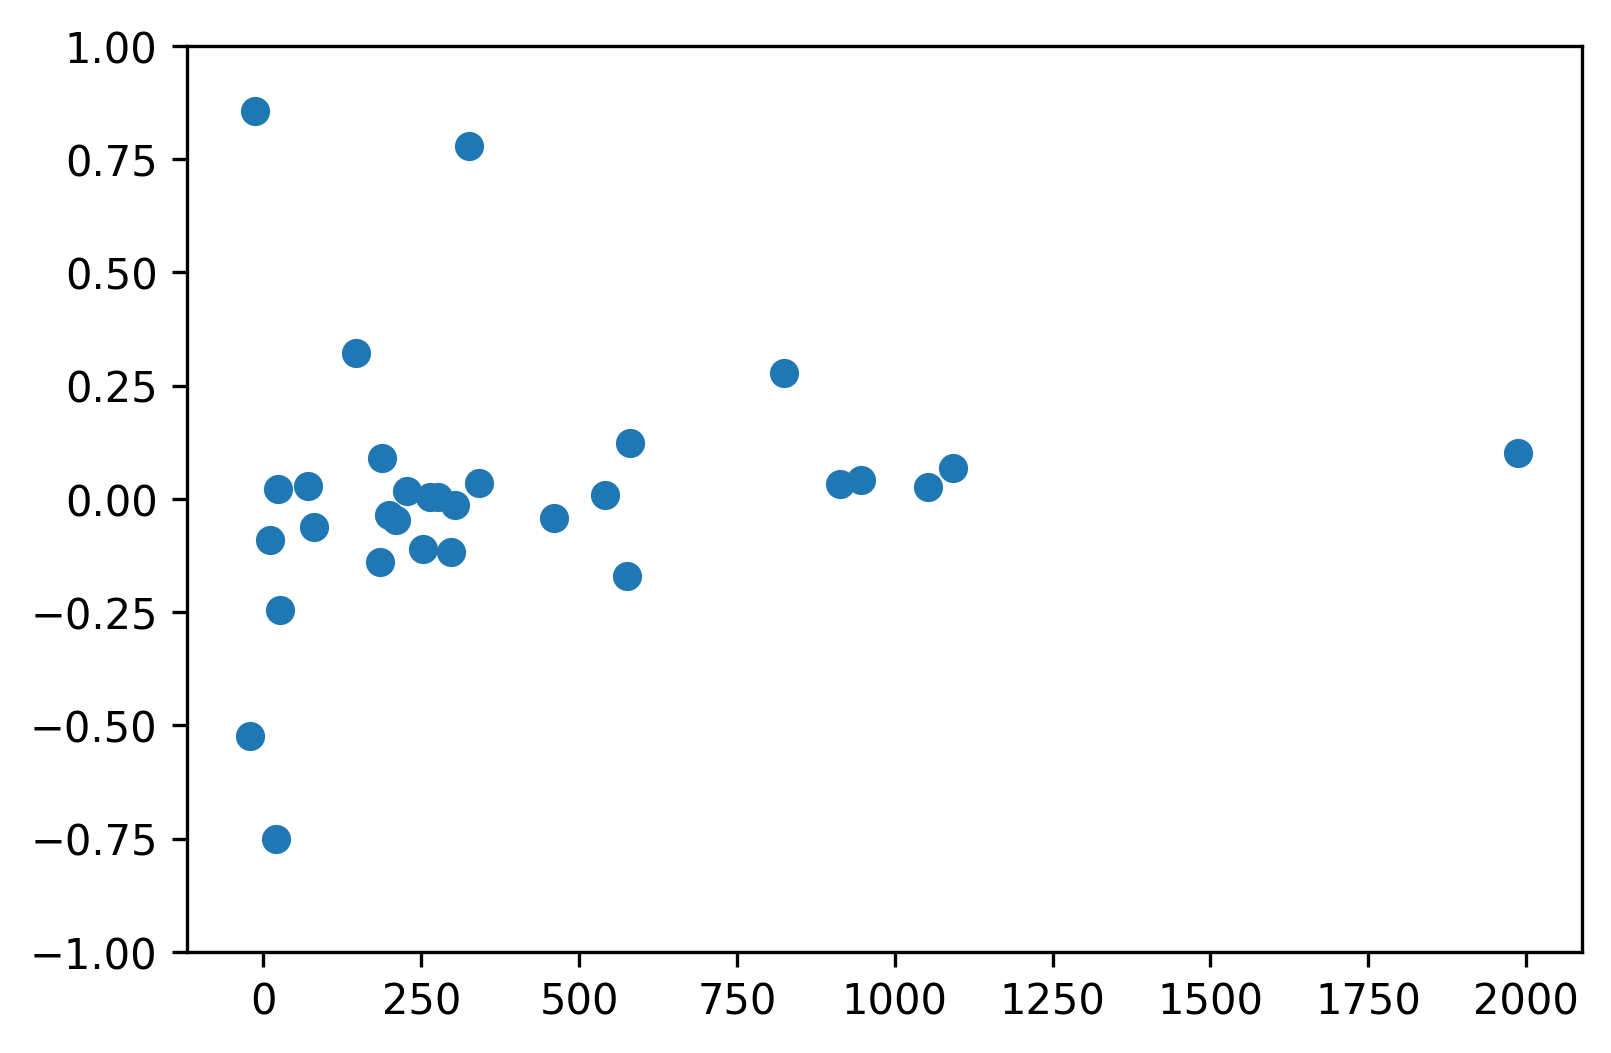

In [10]:
# 4. 减去阴性对照峰值
# 遍历remain_data
for index, row in init_data.iterrows():
    for key, value in negative_data.iterrows():
        if row['Marker'] == value['Marker']:
            if str(row['Allele']) == value['Allele']:
                init_data.loc[index, 'Height'] = row['Height'] - value['Height']

# 峰值高度与比例的关系
# 获取所有的等位基因的高度和比例
high_list = []
ratio_list = []
for key, value in alleles_dict.items():
    temp_data = init_data[(init_data['Marker'] == key) & ((init_data['Allele'] == value[0]) | (init_data['Allele'] == value[1]))]
    if len(temp_data) == 1:
        high_list.append(temp_data['Height'].values[0] / 2)
        stuff_index = temp_data.index[0]-1
        while True:
            if stuff_index in init_data.index:
                ratio_list.append(init_data.loc[stuff_index, 'Height'] / temp_data['Height'].values[0])
                break
            else:
                stuff_index -= 1
    else:
        high_list.append(temp_data['Height'].values[0])
        high_list.append(temp_data['Height'].values[1])
        stuff_index = temp_data.index[0]-1
        while True:
            if stuff_index in init_data.index:
                ratio_list.append(init_data.loc[stuff_index, 'Height'] / temp_data['Height'].values[0])
                break
            else:
                stuff_index -= 1
        stuff_index = temp_data.index[1]-1
        while True:
            if stuff_index in init_data.index:
                ratio_list.append(init_data.loc[stuff_index, 'Height'] / temp_data['Height'].values[1])
                break
            else:
                stuff_index -= 1

plt.figure(dpi=300)
plt.scatter(high_list, ratio_list)
plt.ylim(-1, 1)
